In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

(28, 28, 4)
<class 'numpy.ndarray'>


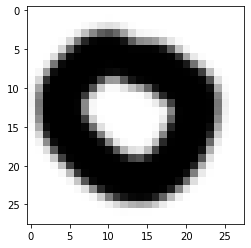

In [5]:
import matplotlib.pyplot as plt
c0 = plt.imread('test/0/1.png')
print(c0.shape) # 4 : RGBA (RGB와 투명도)
print(type(c0))
plt.imshow(c0)

In [10]:
from PIL import Image
import numpy as np
c0 = Image.open('test/0/1.png')
display(c0)
c0 = np.array(c0)
print(c0.shape)

(28, 28, 4)


In [11]:
c0

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

# CNN

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링(특징 추출)
from tensorflow.keras.layers import MaxPooling2D # 풀링
from tensorflow.keras.layers import Flatten # 2차원데이터를 1차원
from tensorflow.keras.layers import Dense, Dropout
np.random.seed(3)

In [14]:
temp = Image.open('data/handwriting/handwriting_shape/train/circle/circle001.png')
np.array(temp).shape

(24, 24, 4)

In [15]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
train_data = train_datagen.flow_from_directory(
                'data/handwriting/handwriting_shape/train',
                target_size = (24,24),
                class_mode = 'categorical',
                batch_size=3 )
test_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
test_data = test_datagen.flow_from_directory(
                'data/handwriting/handwriting_shape/test',
                target_size = (24,24),
                class_mode = 'categorical',
                batch_size=3 )

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [16]:
# 2. 모델 구성
## Conv2D(필터갯수, 필터사이즈, activation_fun, 입력 shape)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Flatten()) # 2차원 데이터를 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [17]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_data, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_data,
                   validation_steps=5)

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 40ms/step - loss: 1.3394 - accuracy: 0.5111 - val_loss: 0.7049 - val_accuracy: 0.8000
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4082 - accuracy: 0.8667 - val_loss: 0.2693 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1048 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 8/50
15

In [18]:
# 5. 모델 평가
score = model.evaluate_generator(test_data, steps=5)
print('loss :', score[0])
print('accuracy :', score[1])

loss : 0.02024765871465206
accuracy : 1.0


C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [22]:
# 예측하기
pred = model.predict_generator(test_data)
print(test_data.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(pred)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.11 0.77 0.12]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [0.00 0.01 0.99]
 [0.96 0.00 0.04]]


C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


# accuracy 늘리기
    * 데이터 확보, 데이터 부풀리기(ImageDataGenerator)
    * 레이어 층(Conv , Dense)

In [23]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255, # 정규화 작업
                                  rotation_range=10,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.7, # 0.7라이안 밀림
                                  zoom_range=[0.9,2.1],
                                  horizontal_flip=True, # 수평방향 뒤집기
                                  vertical_flip=True, # 수직방향 뒤집기
                                  fill_mode='nearest' # 이미지 확대시 채우는 방식
                                  )
train_data = train_datagen.flow_from_directory(
                'data/handwriting/handwriting_shape/train',
                target_size = (24,24),
                class_mode = 'categorical',
                batch_size=3 )
test_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
test_data = test_datagen.flow_from_directory(
                'data/handwriting/handwriting_shape/test',
                target_size = (24,24),
                class_mode = 'categorical',
                batch_size=3 )

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [24]:
# 2. 모델 구성
## Conv2D(필터갯수, 필터사이즈, activation_fun, 입력 shape)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Dropout(0.1)) # 과적합을 막는 목적
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten()) # 2차원 데이터를 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_data, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_data,
                   validation_steps=5)

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 39ms/step - loss: 1.1317 - accuracy: 0.3111 - val_loss: 1.0974 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0998 - accuracy: 0.3333 - val_loss: 1.0865 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0796 - accuracy: 0.4444 - val_loss: 1.0925 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0167 - accuracy: 0.4889 - val_loss: 1.3477 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0641 - accuracy: 0.4444 - val_loss: 1.0889 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.9705 - accuracy: 0.4889 - val_loss: 1.4112 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.8394 - accuracy: 0.5556 - val_loss: 1.4920 - val_accuracy: 0.3333
Epoch 8/50
15/15 [